In [324]:
import numpy as np
import pandas as pd
import re
import seaborn as sns

In [325]:
data = pd.read_csv('fatal-police-shootings-data.csv')

In [326]:
df = pd.DataFrame(data)

In [327]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [328]:
dx = df.pivot_table(values='id', index='race', columns='signs_of_mental_illness', aggfunc='count')

In [329]:
dx

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [330]:
print(dx[0])

race
A      69
B    1114
H     745
N      64
O      37
W    1763
Name: False, dtype: int64


In [331]:
dx.to_numpy()

array([[  69,   24],
       [1114,  184],
       [ 745,  157],
       [  64,   14],
       [  37,   11],
       [1763,  713]], dtype=int64)

### Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [332]:
def perc(row):
    perc = row[1]/(row[1]+row[0])
    return round(perc,2)
    

In [333]:
dx['deaths / signs_of_mental_illness'] = dx.apply(lambda row: perc(row), axis=1)

In [334]:
dx

signs_of_mental_illness,False,True,deaths / signs_of_mental_illness
race,,,
A,69,24,0.26
B,1114,184,0.14
H,745,157,0.17
N,64,14,0.18
O,37,11,0.23
W,1763,713,0.29


In [335]:
dz = dx
dz

signs_of_mental_illness,False,True,deaths / signs_of_mental_illness
race,,,
A,69,24,0.26
B,1114,184,0.14
H,745,157,0.17
N,64,14,0.18
O,37,11,0.23
W,1763,713,0.29


In [336]:
dz[dz['deaths / signs_of_mental_illness'] == max(dz['deaths / signs_of_mental_illness'])]

signs_of_mental_illness,False,True,deaths / signs_of_mental_illness
race,,,
W,1763,713,0.29


### Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [337]:
df['date'] = pd.to_datetime(df['date'])

In [338]:
df['deaths by day'] = df['date'].dt.day_name()

In [339]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,deaths by day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday


In [340]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dk = df['deaths by day'].value_counts()
dk = dk.reindex(index=order)
dk

Monday       726
Tuesday      816
Wednesday    829
Thursday     810
Friday       761
Saturday     721
Sunday       753
Name: deaths by day, dtype: int64

<AxesSubplot:ylabel='deaths by day'>

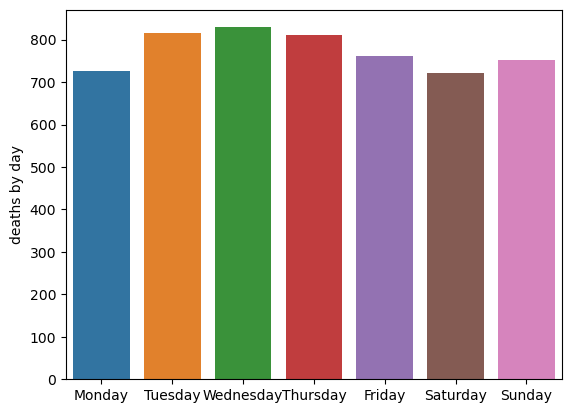

In [341]:
sns.barplot(x=order, y=dk, data=df)

### Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [342]:
data_1 = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', attrs={"class": "wikitable sortable"})

In [343]:
table_1 = pd.DataFrame(data_1[0])
table_1.head()

,"Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).1","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).2","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).3","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).4","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).5","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO a

In [344]:
table_1.rename(columns={table_1.columns[0]: 'State',table_1.columns[1]: 'IfState', table_1.columns[3]: 'Code'}, inplace=True)
table_1.head()

,State,IfState,"Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).2",Code,"Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).4","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).5","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).6","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).7","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).8","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows diff

In [345]:
table_1 = table_1[['State', 'Code', 'IfState']]
table_1.head(15)

,State,Code,IfState
0,Codes:,NaN,Codes:
1,ISO,NaN,"ISO 3166 codes (2-letter, 3-letter, and 3-digi..."
2,ANSI,NaN,2-letter and 2-digit codes from the ANSI stand...
3,USPS,NaN,2-letter codes used by the United States Posta...
4,USCG,NaN,2-letter codes used by the United States Coast...
5,Abbreviations:,NaN,Abbreviations:
6,GPO,NaN,Older variable-length official US Government P...
7,AP,NaN,Abbreviations from the AP Stylebook (bold red ...
8,Name and status of region,ANSI,Name and status of region
9,NaN,NaN,NaN


In [346]:
table_1 = table_1[table_1['IfState'] == 'State']
table_1.head()

,State,Code,IfState
11,Alabama,AL,State
12,Alaska,AK,State
13,Arizona,AZ,State
14,Arkansas,AR,State
15,California,CA,State


In [347]:
data_2 = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', attrs={"class": "wikitable sortable"})

In [348]:
table_2 = pd.DataFrame(data_2[0])

In [349]:
table_2.head()

,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019[2]","Census population, April 1, 2010[3]","Percent change, 2010–2019[note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019[note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018[note 3]"
0,1.0,1.0,California,39512223,37254523,6.1%,+2257700,53,718404,745514,702885,11.96%
1,2.0,2.0,Texas,28995881,25145561,15.3%,+3850320,36,763050,805441,698503,8.68%
2,3.0,3.0,New York,21477737,18801310,14.2%,+2676427,27,740611,795472,696468,6.44%
3,4.0,4.0,Florida,19453561,19378102,0.4%,+75459,27,670812,720502,717707,5.91%
4,5.0,5.0,Illinois,12801989,12702379,0.8%,+99610,18,640099,711222,705715,3.87%


In [350]:
df['deaths'] = 1
table_3 = df[['state','deaths']]
table_3 = table_3.rename(columns={'state': 'Code'})
table_3.head()

,Code,deaths
0,WA,1
1,OR,1
2,KS,1
3,CA,1
4,CO,1


In [351]:
t_f = table_3.join(table_1.set_index('Code'), on='Code')

In [352]:
t_f = t_f.groupby(by='State', as_index=False).sum()
t_f.head()

,State,deaths
0,Alabama,104
1,Alaska,39
2,Arizona,254
3,Arkansas,83
4,California,799


In [353]:
t_ff = t_f.join(table_2.set_index('State'), on='State')
t_x = t_ff.drop(columns={'Rank in states & territories, 2019', 'Rank in states & territories, 2010', 'Census population, April 1, 2010[3]', 'Percent change, 2010–2019[note 1]', 'Absolute change, 2010-2019', 'Total seats in the U.S. House of Representatives, 2013–2023', 'Estimated population per electoral vote, 2019[note 2]', 'Estimated population per House seat, 2019', 'Census population per House seat, 2010'})
t_x = t_x.rename(columns={'Population estimate, July 1, 2019[2]': 'Population estimate 2019'})
t_x.head()

,State,deaths,Population estimate 2019,"Percent of the total U.S. population, 2018[note 3]"
0,Alabama,104,4903185,1.48%
1,Alaska,39,731545,0.22%
2,Arizona,254,7278717,2.17%
3,Arkansas,83,3017825,0.91%
4,California,799,39512223,11.96%


In [354]:
def per_1000(row):
    per = row['deaths']/row['Population estimate 2019']*1000
    return round(per, 2)

In [355]:
t_x['Deaths per 1000 people'] = t_x.apply(lambda row: per_1000(row), axis=1)

In [356]:
t_x.head()

,State,deaths,Population estimate 2019,"Percent of the total U.S. population, 2018[note 3]",Deaths per 1000 people
0,Alabama,104,4903185,1.48%,0.02
1,Alaska,39,731545,0.22%,0.05
2,Arizona,254,7278717,2.17%,0.03
3,Arkansas,83,3017825,0.91%,0.03
4,California,799,39512223,11.96%,0.02
